In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [2]:
# read csv-file
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 【課題1】練習のために特徴量の選択

In [3]:
# Extraction of GrLivArea and YearBuilt
df_grlivearea_yearbuilt = df[['GrLivArea', 'YearBuilt','SalePrice']]

In [4]:
# confirm data 
df_grlivearea_yearbuilt.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
# confirm the data_type
df_grlivearea_yearbuilt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [6]:
# confirm the null
df_grlivearea_yearbuilt.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

### 【課題2】回帰問題のパイプライン

C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


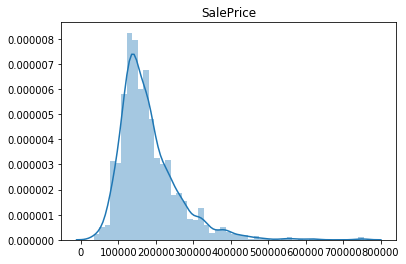

In [7]:
# Probability density function
y = df_grlivearea_yearbuilt['SalePrice'].values
plt.title('SalePrice')
sns.distplot(y)
plt.show()

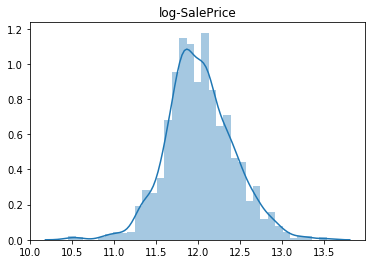

In [9]:
# Logarization
y_log = np.log(y)
sns.distplot(y_log)
plt.title('log-SalePrice')
plt.show()

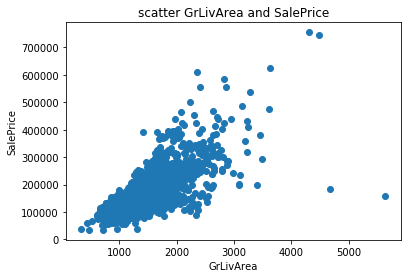

In [11]:
# Scatter plot SalePrice and GrLivArea 
x_grlivarea = df_grlivearea_yearbuilt['GrLivArea'].values
plt.title('scatter GrLivArea and SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(x_grlivarea,y)
plt.show()


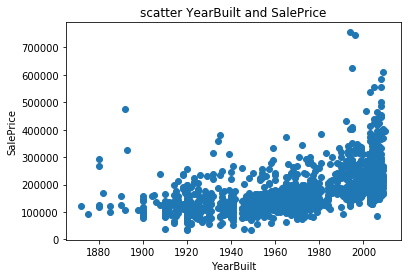

In [12]:
# Scatter plot SalePrice and YearBuilt
x_yearbuilt =  df_grlivearea_yearbuilt['YearBuilt'].values
plt.title('scatter YearBuilt and SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(x_yearbuilt, y)
plt.show()

In [13]:
# y='SalePrice' x = 'GrLivArea' and  'YearBuilt'

X = df_grlivearea_yearbuilt.iloc[:,:-1]
y = df_grlivearea_yearbuilt.iloc[:, -1]

In [14]:
# standardization
scaler = StandardScaler()
X_standard = scaler.fit(X)
X_standard = scaler.transform(X)

C:\Users\umini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\umini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [16]:
X_standard

array([[ 0.37033344,  1.05099379],
       [-0.48251191,  0.15673371],
       [ 0.51501256,  0.9847523 ],
       ...,
       [ 1.56964722, -1.00249232],
       [-0.83278768, -0.70440562],
       [-0.49393395, -0.20759447]])

In [17]:
# train_test_split test_size = 0.3
X = X_standard
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 2)
(438, 2)
(1022,)
(438,)


In [19]:
# LinearRegression fit
lr = LinearRegression().fit(X_train, y_train)
# a1, a2
a1, a2 = lr.coef_
print(lr.coef_)
# b
b = lr.intercept_
print(lr.intercept_)

[0.25148162 0.18983148]
12.025089248872904


In [20]:
# predict
y_train_pred = lr.predict(X_train)
print(y_train_pred.shape)

(1022,)


In [21]:
# Meen square error of Linear Regression
y_test_pred = lr.predict(X_test)
lr_mse_train = mean_squared_error(y_train, y_train_pred)
lr_mse_test =  mean_squared_error(y_test, y_test_pred)
print('MSE train data: ', lr_mse_train) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', lr_mse_test)

MSE train data:  0.04513902506581432
MSE test data:  0.05478213974849944


In [22]:
r2score = r2_score(y_test,y_test_pred)
print(r2score)

0.6438010977902398


C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


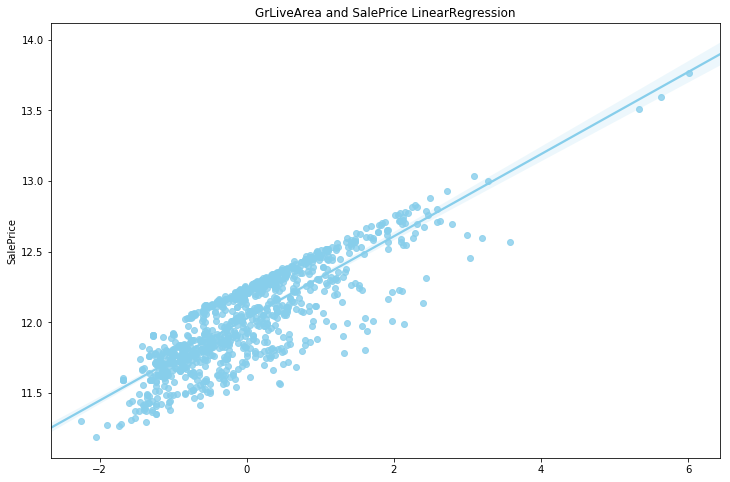

In [23]:
x1 = X_train[:,0]
#regplot Add a regression line to the scatter plot
fig = plt.figure(figsize=(12, 8))
plt.title('GrLiveArea and SalePrice LinearRegression')
plt.ylabel('SalePrice')
sns.regplot(x=x1, y=y_train_pred, color='skyblue')
plt.show()

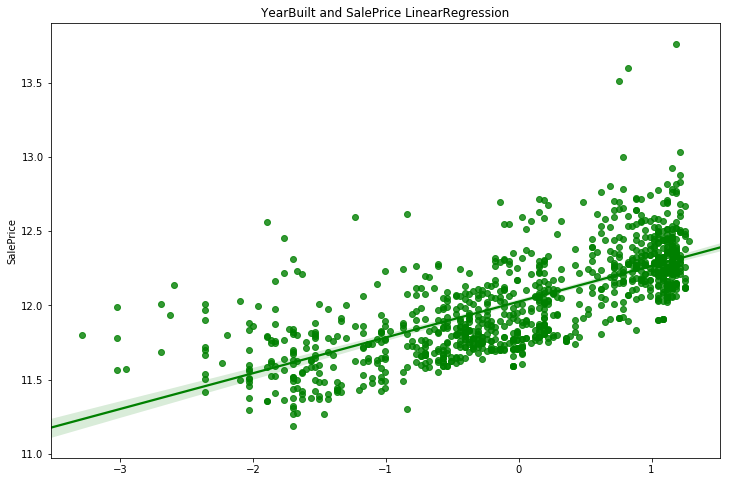

In [24]:
x2 = X_train[:,1]
#regplot Add a regression line to the scatter plot
fig = plt.figure(figsize=(12, 8))
plt.title('YearBuilt and SalePrice LinearRegression')
plt.ylabel('SalePrice')
sns.regplot(x=x2, y=y_train_pred, color='green')
plt.show()

### 【課題3】手法の比較

In [25]:
#SVM
from sklearn import svm
clf_svm = svm.SVR(gamma='auto')
clf_svm.fit(X_train, y_train)
y_train_pred_svm = clf_svm.predict(X_train)
#print(y_train_pred_svm)
y_test_pred_svm = clf_svm.predict(X_test)
#print(y_test_pred_svm)
# MSE
svm_mse_train = mean_squared_error(y_train, y_train_pred_svm)
svm_mse_test = mean_squared_error(y_test,y_test_pred_svm)
print('MSE train data: ', svm_mse_train) 
print('MSE test data: ', svm_mse_test)

MSE train data:  0.03861791027232428
MSE test data:  0.041986371801735985


C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


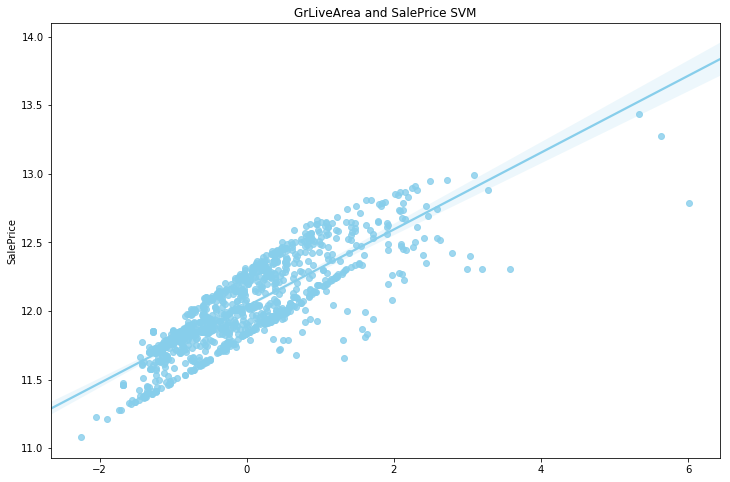

In [26]:
# SVM graph GrLiveArea
fig = plt.figure(figsize=(12, 8))
plt.title('GrLiveArea and SalePrice SVM')
plt.ylabel('SalePrice')
sns.regplot(x=x1, y=y_train_pred_svm, color='skyblue')
plt.show()

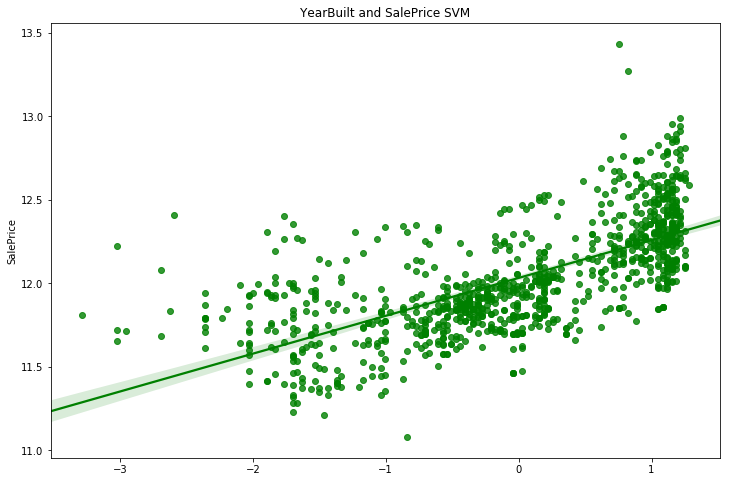

In [27]:
# SVM graph YearBuilt
fig = plt.figure(figsize=(12, 8))
plt.title('YearBuilt and SalePrice SVM')
plt.ylabel('SalePrice')
sns.regplot(x=x2, y=y_train_pred_svm, color='green')
plt.show()

In [28]:
#決定木
from sklearn.tree import DecisionTreeRegressor
clf_tree = DecisionTreeRegressor(max_depth=5)
clf_tree.fit(X_train, y_train)
y_train_pred_tree = clf_tree.predict(X_train)
#print(y_train_pred_tree)
y_test_pred_tree = clf_tree.predict(X_test)
#print(y_test_pred_tree)
 # MSE
tree_mse_train = mean_squared_error(y_train, y_train_pred_tree)
tree_mse_test = mean_squared_error(y_test,y_test_pred_tree)
print('MSE train data: ', tree_mse_train) 
print('MSE test data: ', tree_mse_test)

MSE train data:  0.03457564606281783
MSE test data:  0.047873536808894335


C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


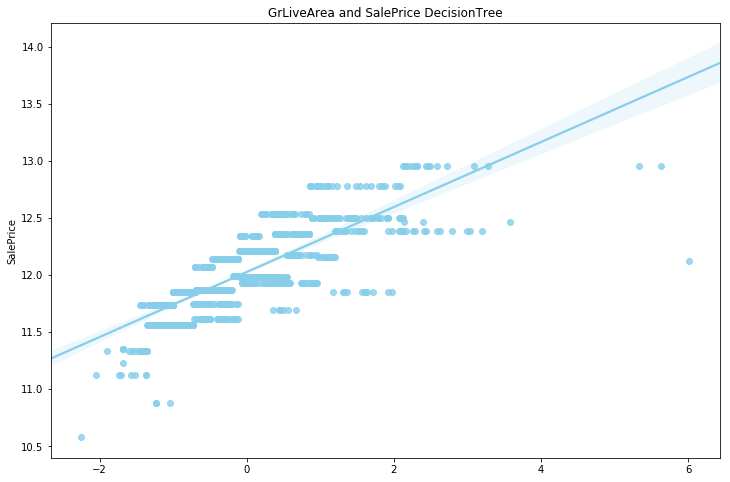

In [29]:
# DecisionTree graph GrLiveArea
fig = plt.figure(figsize=(12, 8))
plt.title('GrLiveArea and SalePrice DecisionTree')
plt.ylabel('SalePrice')
sns.regplot(x=x1, y=y_train_pred_tree, color='skyblue')
plt.show()

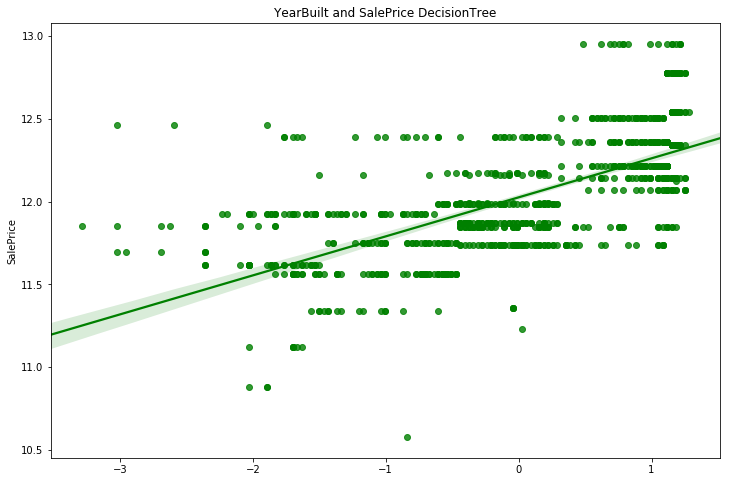

In [30]:
# DecisionTree graph 
fig = plt.figure(figsize=(12, 8))
plt.title('YearBuilt and SalePrice DecisionTree')
plt.ylabel('SalePrice')
sns.regplot(x=x2, y=y_train_pred_tree, color='green')
plt.show()

In [31]:
# randomforest
clf_forest = RandomForestRegressor(max_depth=3)
clf_forest.fit(X_train, y_train)
y_train_pred_forest = clf_forest.predict(X_train)
#print(y_train_pred_forest)
y_test_pred_forest = clf_forest.predict(X_test)
#print(y_test_pred_forest)
 # MSE
forest_mse_train = mean_squared_error(y_train, y_train_pred_forest)
forest_mse_test = mean_squared_error(y_test,y_test_pred_forest)
print('MSE train data: ', forest_mse_train) 
print('MSE test data: ', forest_mse_test)

MSE train data:  0.04547496803076316
MSE test data:  0.052955227877671734


C:\Users\umini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


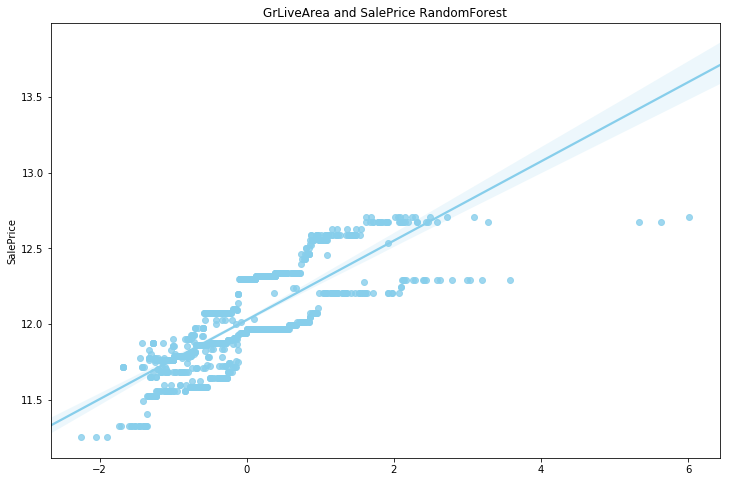

In [32]:
# RandomForest graph GrLiveArea
fig = plt.figure(figsize=(12, 8))
plt.title('GrLiveArea and SalePrice RandomForest')
plt.ylabel('SalePrice')
sns.regplot(x=x1, y=y_train_pred_forest, color='skyblue')
plt.show()

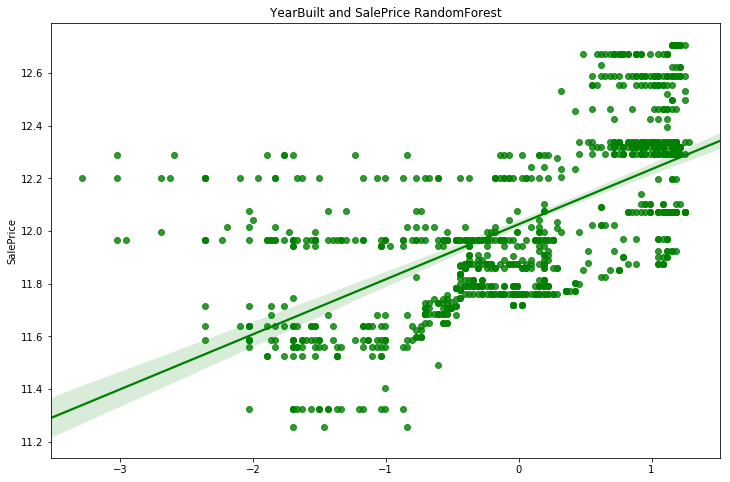

In [33]:
# RandomForest graph GrLiveArea
fig = plt.figure(figsize=(12, 8))
plt.title('YearBuilt and SalePrice RandomForest')
plt.ylabel('SalePrice')
sns.regplot(x=x2, y=y_train_pred_forest, color='green')
plt.show()

In [34]:
# mse data
mse_dict = {'LinearRegression':[lr_mse_train, lr_mse_test],
            'SVM':[svm_mse_train, svm_mse_test],
            'DecisionTree':[tree_mse_train,tree_mse_test],
            'RandomForest':[forest_mse_train,forest_mse_test]}
index_list = ['MSE train data','MSE test data']

mse_df = pd.DataFrame(mse_dict, index=index_list)
mse_df

,LinearRegression,SVM,DecisionTree,RandomForest
MSE train data,0.045139,0.038618,0.034576,0.045475
MSE test data,0.054782,0.041986,0.047874,0.052955


### 線形回帰について
散布図から判断するに2つの特徴量GrLiveArea,YearBuiltともにほとんどのプロットと回帰直線が近い距離にあるように思う.testのMSEは二番目に良い

### SVM
SVMにおいても線形回帰同様にプロットと回帰直線がマッチしている.
trainのMSEは線形回帰よりもSVMの方が低く、testのMSEは4つの中で
最も低いためSVMが最も精度がよいことが示唆される.

### 決定木
決定木の散布図は線形回帰やSVMと違いSalePriceの対数が同一となる点が
多数出現している.trainのMSEは4つにの中で一番低いが,testのMSEは三番手である

### ランダムフォレスト
ランダムフォレストは4つの中でtrain,testともに最もMSEが高くなり,精度が低かった.
散布図を見る限り特にYearBuiltにマッチしてないのではないかという印象を受ける

### 修正点(second submit)
1 StandardScalesを実行
2 3D散布図を削除
3 4つの手法を比較しコメントした